Proyecto 1 IA v1.0.1

Pablo Hidalgo
Axel Chaves
Kevin Nuñez

In [10]:
# biblioteca para abrir el archivo de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# bibliotecas necesarias para balancear el contenido
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
# bibliotecas necesarias para predicciones
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
# bibliotecas para el análisis de rendimiento
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score

# abrir y leer el archivo
dataset = pd.read_csv('Datasets/diabetes.csv')
print(dataset.head())
dataset.info()
dataset.describe()

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


c:\Users\hidal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


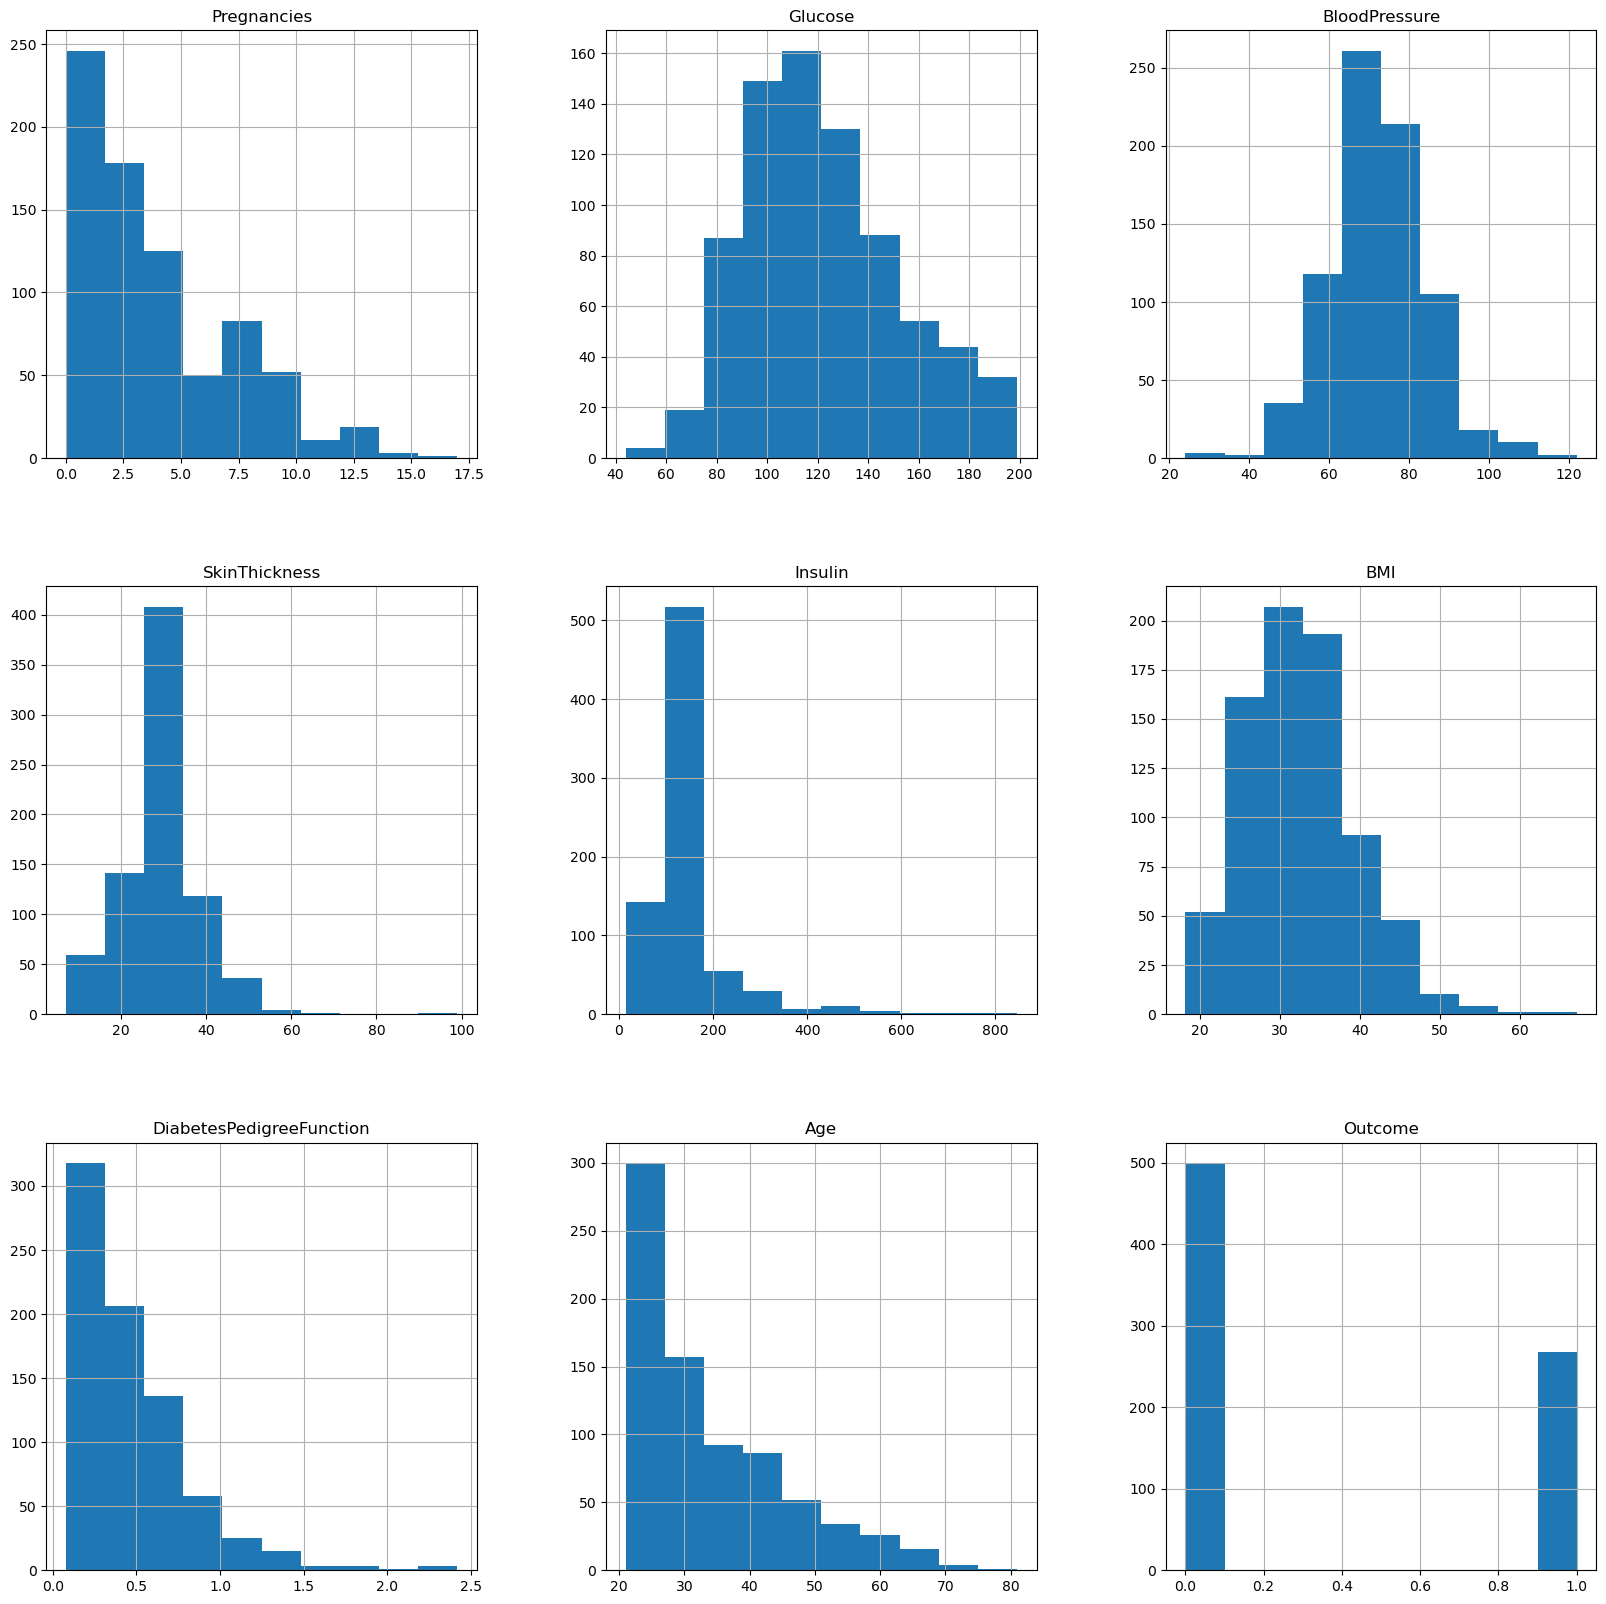

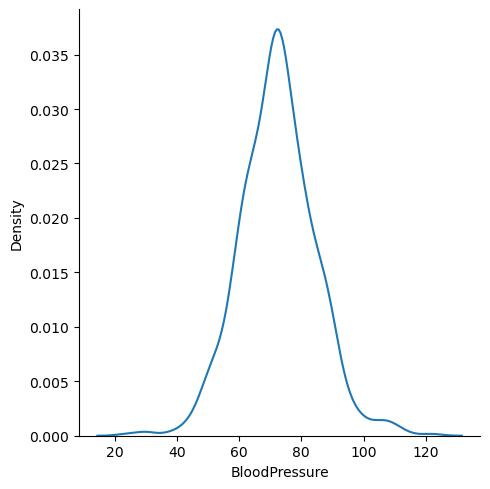

In [11]:

# llenar datos nulos
data_copy = dataset.copy(deep = True)
data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
print(data_copy.isnull().sum())
data_copy['Glucose'] = data_copy['Glucose'].fillna(data_copy['Glucose'].mean())
data_copy['BloodPressure'] = data_copy['BloodPressure'].fillna(data_copy['BloodPressure'].mean())
data_copy['SkinThickness'] = data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].median())
data_copy['Insulin'] = data_copy['Insulin'].fillna(data_copy['Insulin'].median())
data_copy['BMI'] = data_copy['BMI'].fillna(data_copy['BMI'].median())

p = data_copy.hist(figsize = (20,20))
sns.displot(data_copy['BloodPressure'], kind = 'kde')
plt.show()

c:\Users\hidal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hidal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hidal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


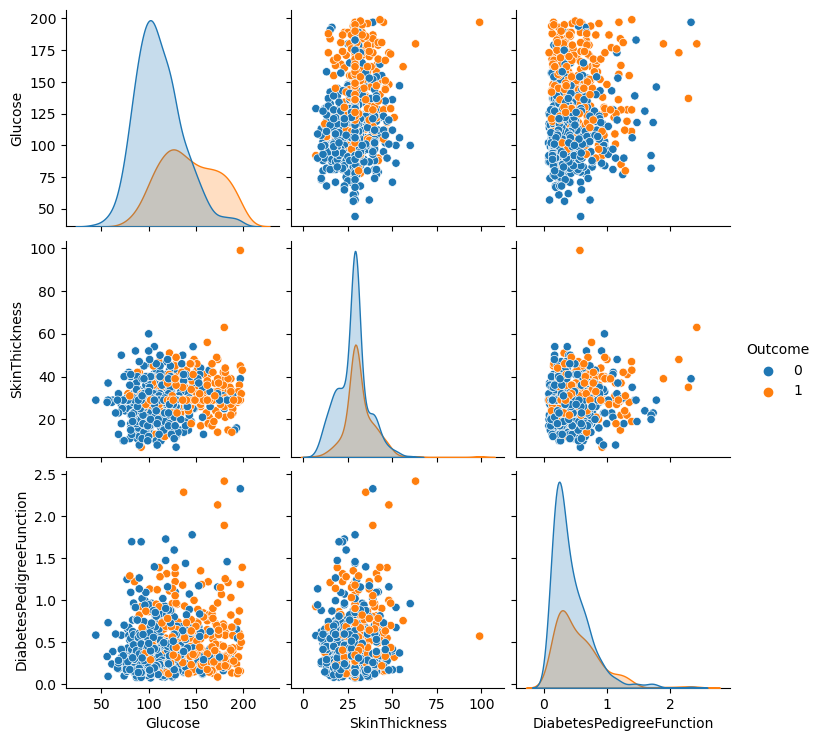

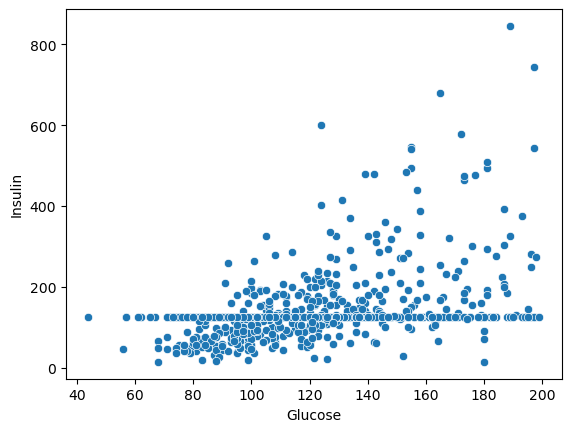

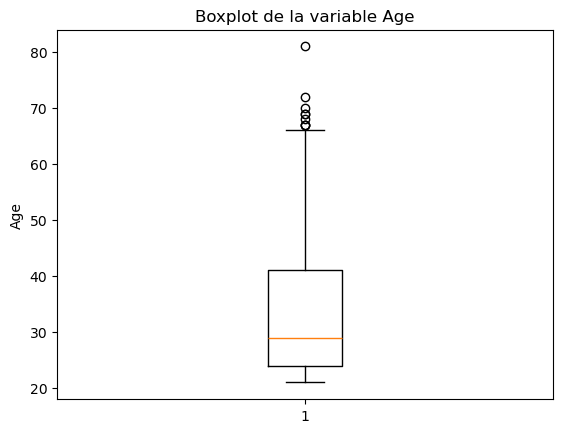

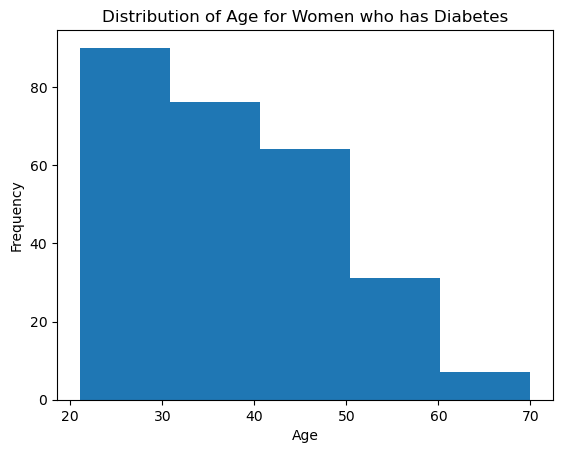

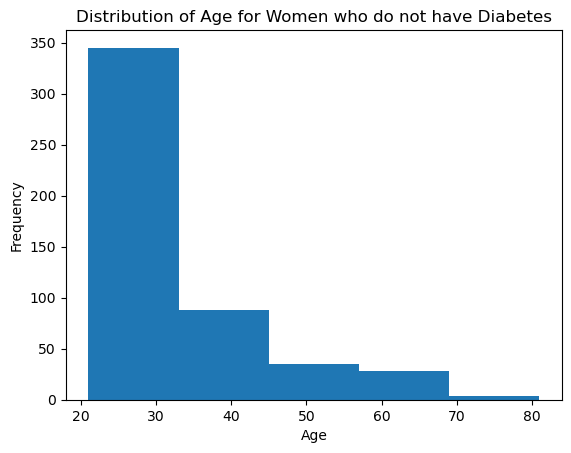

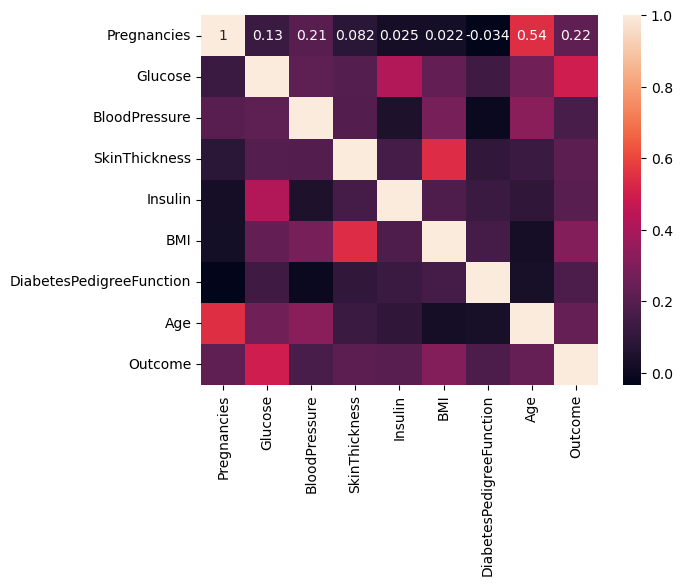

In [12]:

# El valor de "BMI" para la persona con el valor de "Glucose" más alto
data_copy[data_copy['Glucose'] == data_copy['Glucose'].max()]['BMI']

# ¿Cuántas mujeres tienen la glucosa por encima de la media?
data_copy[data_copy['Glucose'] > data_copy['Glucose'].mean()].shape[0]

# ¿Cuántas personas tienen un nivel de glucosa mayor al promedio y un índice de masa corporal menor al promedio?

dataset[(dataset['BloodPressure'] == dataset['BloodPressure'].median()) & (dataset['BMI'] < dataset['BMI'].median())].shape[0]

sns.pairplot(data = data_copy, vars = ['Glucose', 'SkinThickness', 'DiabetesPedigreeFunction'], hue = 'Outcome')
plt.show()

sns.scatterplot(x = 'Glucose', y = 'Insulin', data = data_copy)
plt.show()

plt.boxplot(data_copy['Age'])
plt.title('Boxplot de la variable Age')
plt.ylabel('Age')
plt.show()

plt.hist(data_copy[data_copy['Outcome'] == 1]['Age'], bins = 5)
plt.title('Distribution of Age for Women who has Diabetes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.hist(data_copy[data_copy['Outcome'] == 0]['Age'], bins = 5)
plt.title('Distribution of Age for Women who do not have Diabetes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

sns.heatmap(data_copy.corr(), annot=True)
plt.show()

536 536


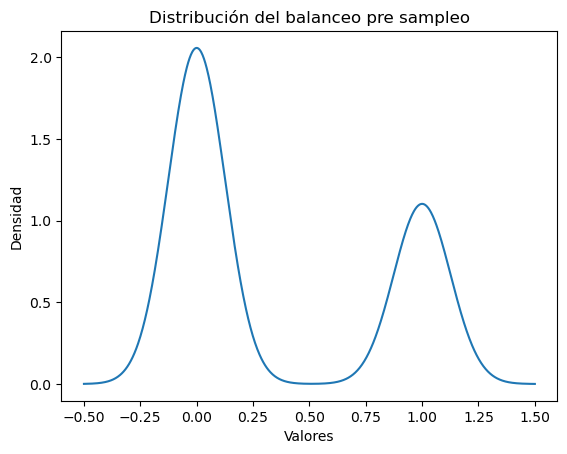

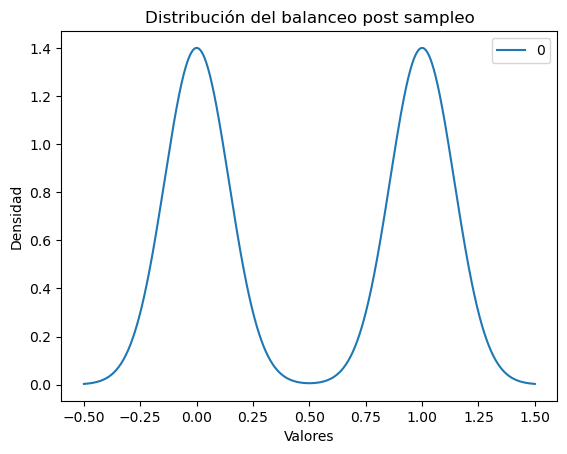

In [18]:

# incluir todos los features
X = data_copy.iloc[:, 0:8]
# incluir solo los labels
y = data_copy.iloc[:, 8]

# seleccionar casos positivos y negativos
positivo = X[y==1]
negativo = X[y==0]

dataset["Outcome"].plot(kind='kde').set_xlabel("Valores")
plt.ylabel("Densidad")
plt.title("Distribución del balanceo pre sampleo")

# DownSample a negativo (clase mayor)
negativo_sampled = resample(negativo, replace=False,n_samples=len(positivo), random_state=42)

# juntar los datos X positivos y negativos sampleados
X_sampled = pd.concat([positivo,negativo_sampled])

# juntar datos Y correspondientes a positivos y negativos sampleados
Y_Pos = pd.DataFrame(np.ones((len(positivo), 1)))
Y_Neg = pd.DataFrame(np.zeros((len(negativo_sampled), 1)))
Y_sampled = pd.concat([Y_Pos, Y_Neg])

print(len(X_sampled),len(Y_sampled))

Y_sampled.plot(kind='kde').set_xlabel("Valores")
plt.ylabel("Densidad")
plt.title("Distribución del balanceo post sampleo")

x_train, x_test, y_train, y_test = train_test_split(X_sampled.values, Y_sampled.values.ravel(), test_size=0.2, random_state=42, stratify=Y_sampled.values.ravel())

In [14]:

# Model Training and Prediction using Logistic Regresion
logreg1 = LogReg(random_state=None, max_iter=1000, fit_intercept=True, tol = 0.5, C=0.1).fit(x_train, y_train)
y_pred1 = logreg1.predict(x_test)
print("Accuracy:",accuracy_score(y_test,y_pred1))

print("")

logreg2 = LogReg(solver = "liblinear").fit(x_train, y_train)
y_pred2 = logreg2.predict(x_test)
print ("Accuracy: " , accuracy_score (y_test , y_pred2))
print("Reporte de clasificación con Regresión Logística:")
print(classification_report(y_test, y_pred2))

Accuracy: 0.7129629629629629

Accuracy:  0.75
Reporte de clasificación con Regresión Logística:
              precision    recall  f1-score   support

         0.0       0.75      0.76      0.75        54
         1.0       0.75      0.74      0.75        54

    accuracy                           0.75       108
   macro avg       0.75      0.75      0.75       108
weighted avg       0.75      0.75      0.75       108



Max train score 100.0 % and k = [1]
Max test score 73.14814814814815 % and k = [5, 7, 11, 20, 22, 27, 29]


c:\Users\hidal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hidal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hidal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hidal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

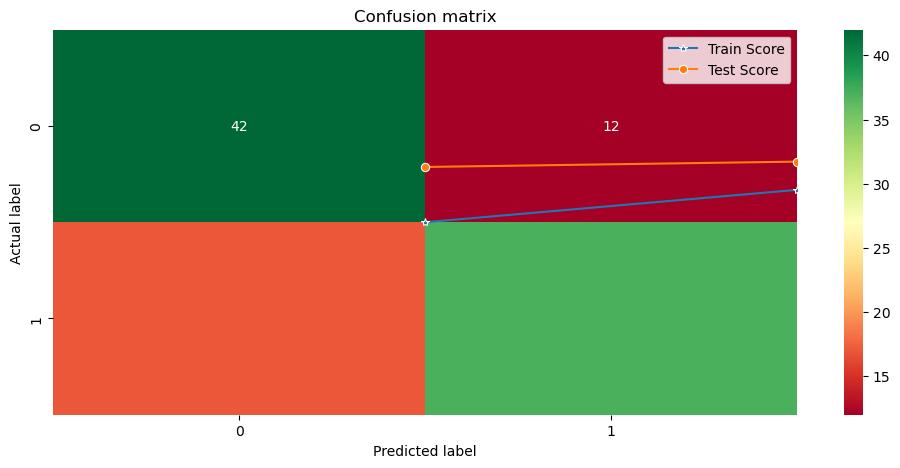

Reporte de clasificación con KNN:
              precision    recall  f1-score   support

         0.0       0.71      0.78      0.74        54
         1.0       0.76      0.69      0.72        54

    accuracy                           0.73       108
   macro avg       0.73      0.73      0.73       108
weighted avg       0.73      0.73      0.73       108



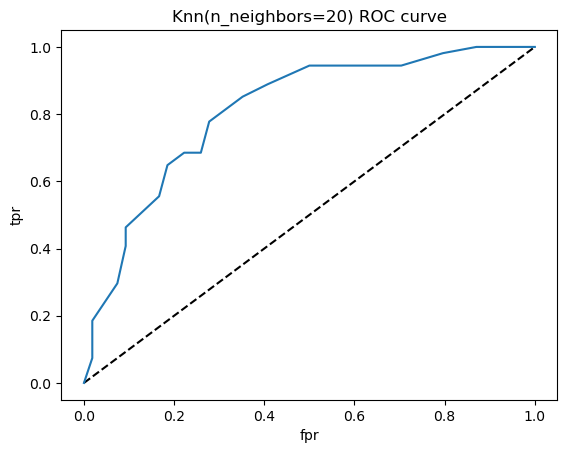

Best Score:0.7276739356178609
Best Parameters: {'n_neighbors': 13}


In [15]:
# Model Training and Prediction using KNN
test_scores = []
train_scores = []

for i in range(1,30):
    knn = KNN(n_neighbors=i)
    knn.fit(x_train,y_train)
    
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

plt.figure(figsize=(12, 5))
p = sns.lineplot(x=range(1, 30), y=train_scores, marker='*', label='Train Score')
p = sns.lineplot(x=range(1, 30), y=test_scores, marker='o', label='Test Score')

knn = KNN(20)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

# Model Performance Analysis
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="RdYlGn" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

print("Reporte de clasificación con KNN:")
print(classification_report(y_test,y_pred))

y_pred_proba = knn.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=20) ROC curve')
plt.show()

roc_auc_score(y_test,y_pred_proba)

param_grid = {'n_neighbors':np.arange(1,30)}
knn = KNN()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_sampled.values, Y_sampled.values.ravel())
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))


In [19]:
# RED NEURONAL
nn = MLPClassifier(hidden_layer_sizes=(77,), max_iter=10000)
nn.fit(x_train, y_train)
nn_pred = nn.predict(x_test)
print("Reporte de clasificación con red Neuronal 2: ")
print(classification_report(y_test, nn_pred))

Reporte de clasificación con red Neuronal 2: 
              precision    recall  f1-score   support

         0.0       0.60      0.52      0.55        54
         1.0       0.57      0.65      0.61        54

    accuracy                           0.58       108
   macro avg       0.58      0.58      0.58       108
weighted avg       0.58      0.58      0.58       108

